In [55]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Store the file of given dataset into a Pandas DataFrame.

data_file = "data/data-pizza-sales.xlsx"
pizza_df = pd.read_excel(data_file)
pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
#Checking number of rows & columns.

# pizza_df.shape
total_rows=len(pizza_df.axes[0])
total_cols=len(pizza_df.axes[1])
print('total rows are : ', total_rows)
print('total columns are : ', total_cols)

total rows are :  48620
total columns are :  12


In [5]:
list(pizza_df.columns)

['order_details_id',
 'order_id',
 'pizza_id',
 'quantity',
 'order_date',
 'order_time',
 'unit_price',
 'total_price',
 'pizza_size',
 'pizza_category',
 'pizza_ingredients',
 'pizza_name']

In [6]:
#Checking for null values in dataframe.

pizza_df.isnull().values.any()

False

^The result is "False" after running the above line of code, which means there are no null values in the given dataset. Hence, we can move forward with this dataset.

In [9]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [14]:
pizza_df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [28]:
pizza_df['order_date'].unique()

array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', '2015-01-04T00:00:00.000000000',
       '2015-01-05T00:00:00.000000000', '2015-01-06T00:00:00.000000000',
       '2015-01-07T00:00:00.000000000', '2015-01-08T00:00:00.000000000',
       '2015-01-09T00:00:00.000000000', '2015-01-10T00:00:00.000000000',
       '2015-01-11T00:00:00.000000000', '2015-01-12T00:00:00.000000000',
       '2015-01-13T00:00:00.000000000', '2015-01-14T00:00:00.000000000',
       '2015-01-15T00:00:00.000000000', '2015-01-16T00:00:00.000000000',
       '2015-01-17T00:00:00.000000000', '2015-01-18T00:00:00.000000000',
       '2015-01-19T00:00:00.000000000', '2015-01-20T00:00:00.000000000',
       '2015-01-21T00:00:00.000000000', '2015-01-22T00:00:00.000000000',
       '2015-01-23T00:00:00.000000000', '2015-01-24T00:00:00.000000000',
       '2015-01-25T00:00:00.000000000', '2015-01-26T00:00:00.000000000',
       '2015-01-27T00:00:00.000000000', '2015-01-28

In [122]:
# What are our best and worst-selling pizzas?

pizza_name_group = pizza_df.groupby("pizza_name")
pizza_name_sum = pizza_name_group.sum()



# print("Best-sellling pizza of the year: ", pizza_name_count.max())
# print("Worst-sellling pizza of the year: ", pizza_name_count.min())

In [129]:
# pizza_name_group.sum()
# pizza_name_group.sum().sort_values("quantity", ascending=False)
pizza_name_sum.sort_values(by=["quantity"], ascending=False)

,order_details_id,order_id,quantity,unit_price,total_price
pizza_name,,,,,
The Classic Deluxe Pizza,59972116,26399795,2453,37631.50,38180.50
The Barbecue Chicken Pizza,56500574,24871757,2432,41683.00,42768.00
The Hawaiian Pizza,58434322,25722266,2422,31561.75,32273.25
The Pepperoni Pizza,56914939,25057726,2418,29538.25,30161.75
The Thai Chicken Pizza,57239960,25195259,2371,42332.25,43434.25
The California Chicken Pizza,56230910,24753723,2370,40166.50,41409.50
The Sicilian Pizza,46174056,20325553,1938,30123.75,30940.50
The Spicy Italian Pizza,46117946,20298905,1924,34163.50,34831.25
The Southwest Chicken Pizza,46239737,20356022,1917,34081.75,34705.75


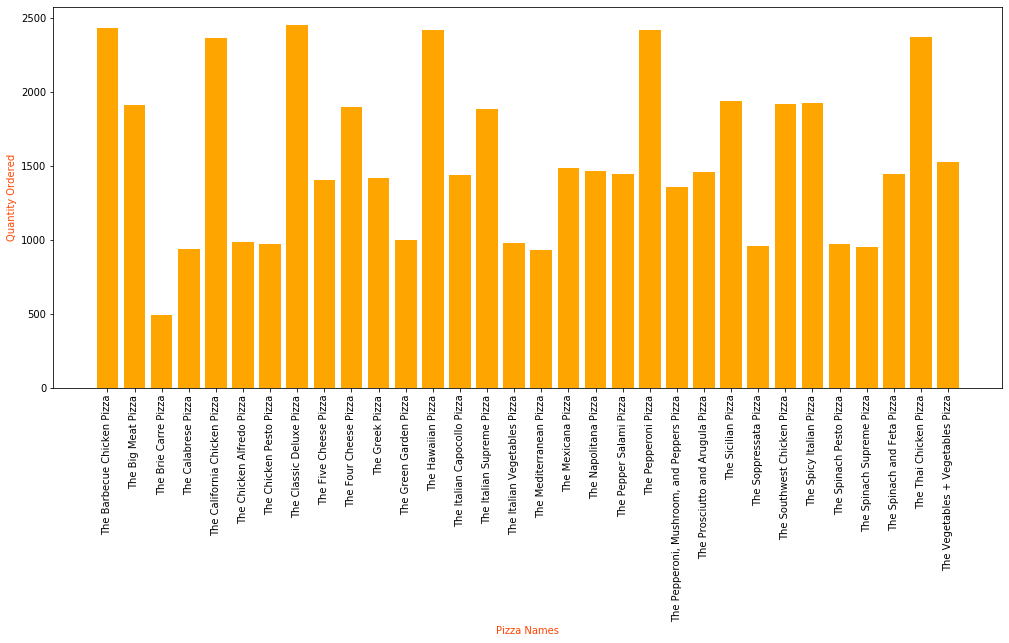

In [124]:
pizza = [pizza for pizza, df in pizza_name_group]

plt.figure(figsize=(17,7))
plt.bar(pizza,pizza_name_sum["quantity"],color="orange")
plt.xticks(pizza,rotation='vertical',size=10)
plt.xlabel('Pizza Names',color='orangered')
plt.ylabel('Quantity Ordered',color='orangered')
plt.show()